# **CH04.01~02 의사결정나무**

**1. 의사결정나무 정의**\
의사결정규칙과 그 결과물들을 트리 구조로 도식화한 것

의사결정나무 구성요소

- 뿌리 마디\
나무 구조가 시작되는 마디(전체 데이터)

- 중간마디\
나무 구조의 중간에 있는 마디

- 끝 마디\
나무 구조의 마지막 위치(더이상 노드 생성되지 않음)

- 깊이\
뿌리 노드에서 제일 끝 마디 까지 가는데 필요한 노드 개수

**알고리즘**

CART(Classification And Regression Tree) 알고리즘
> 목적: 각 분할에서 정보 이득을 최대화하는 것\
  정보이득의 최대화-> 불순도의 감소

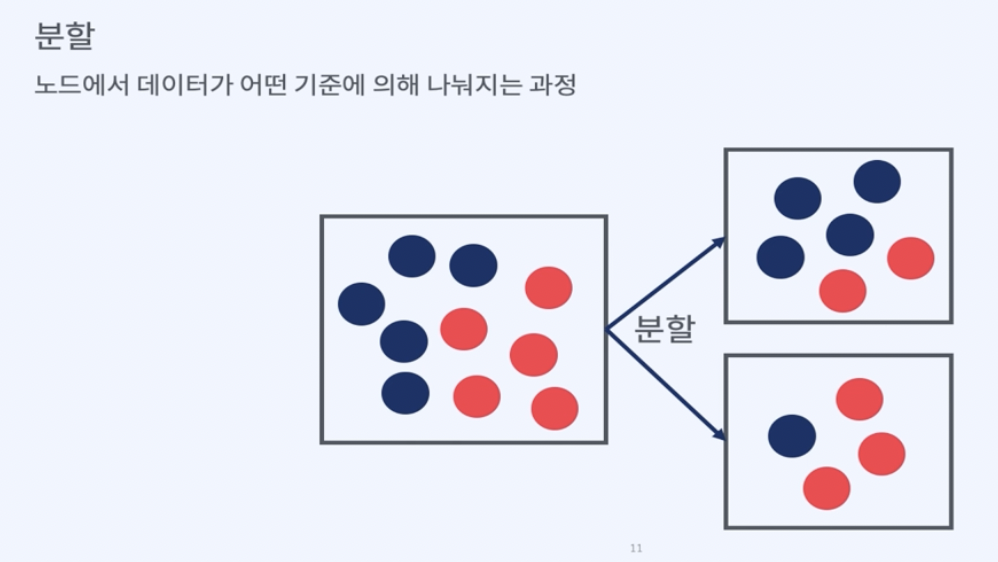

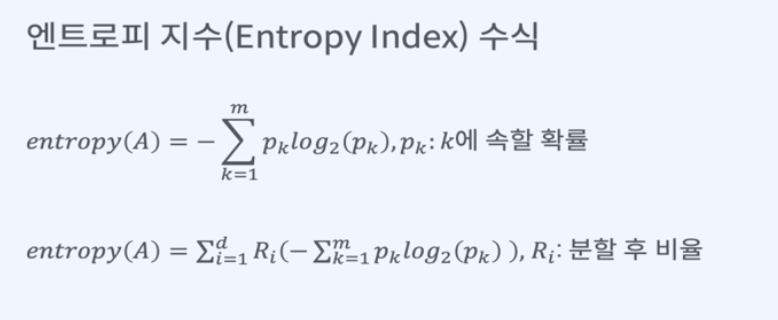

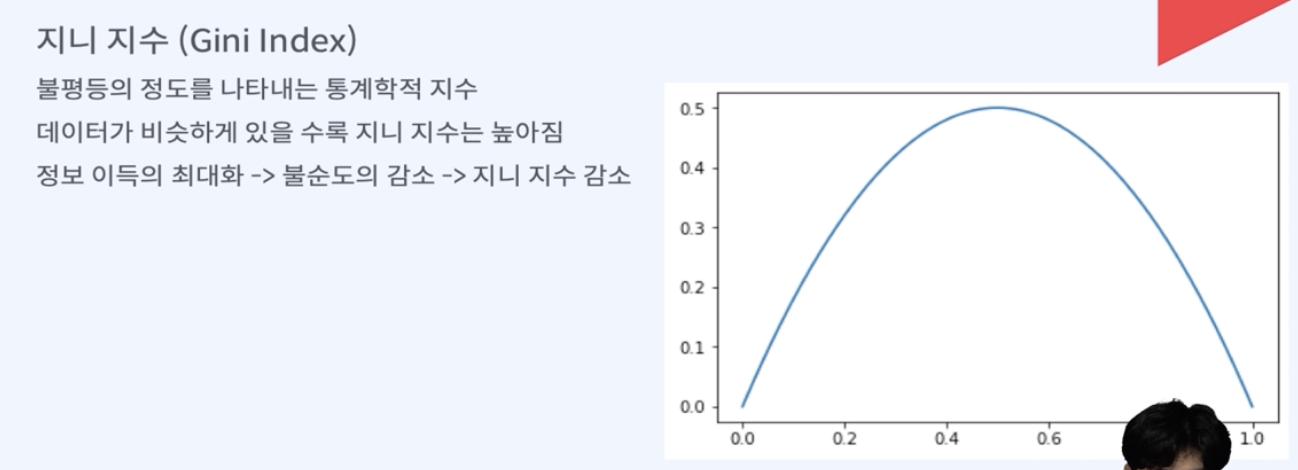

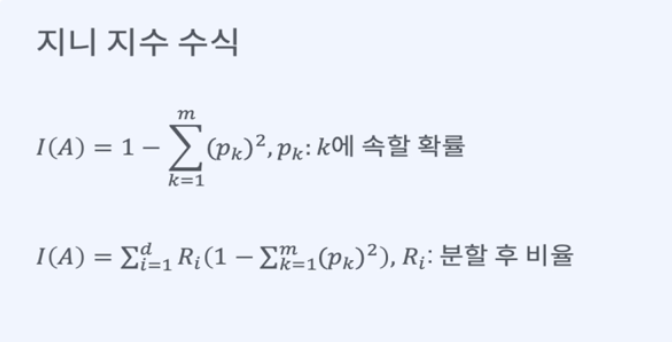

- 가운데를 기점으로 왼쪽과 오른쪽 데이터 분할하여, 각각 평균 계산하고 분산을 구함


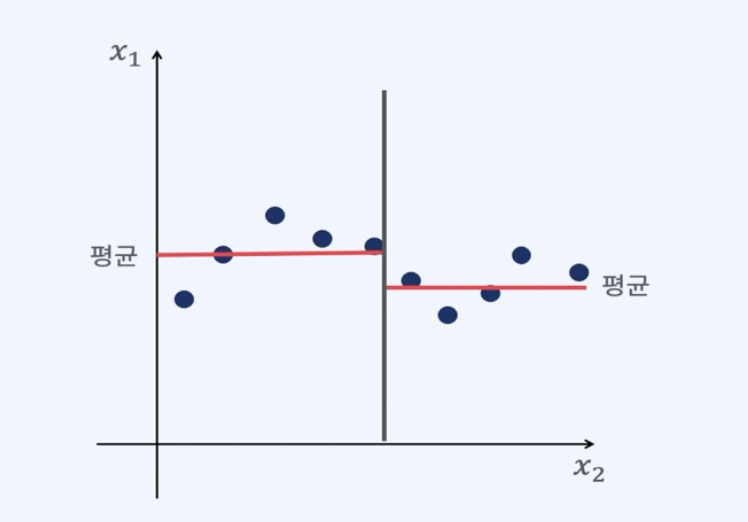

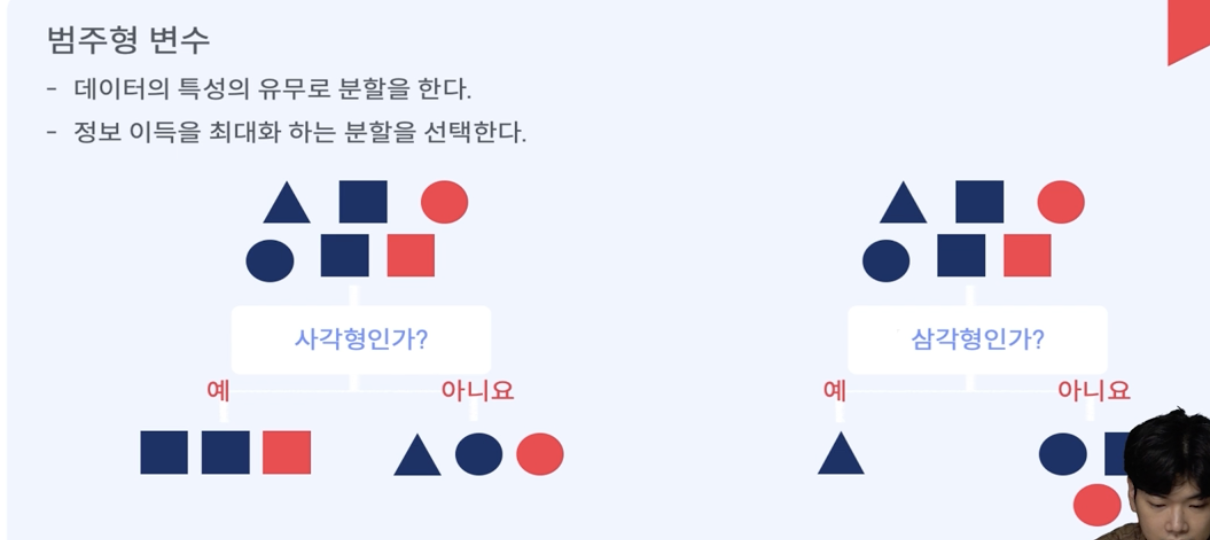

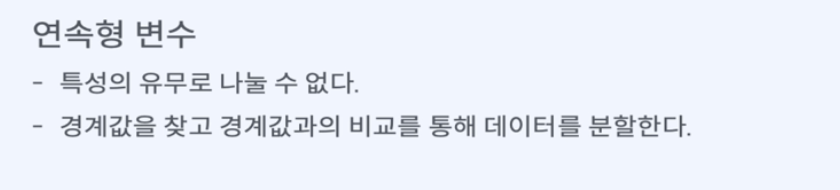

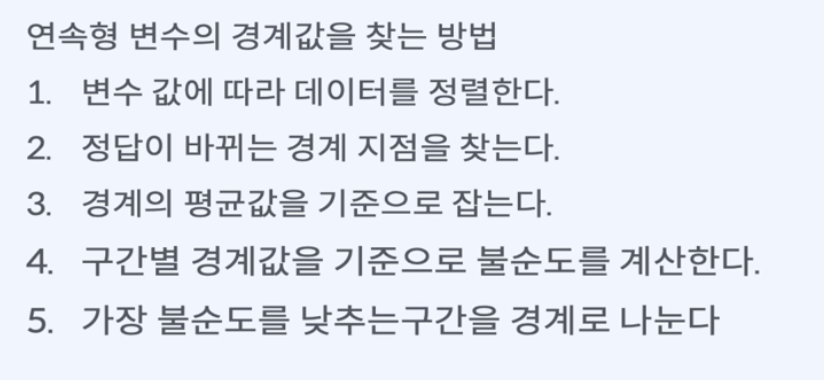

  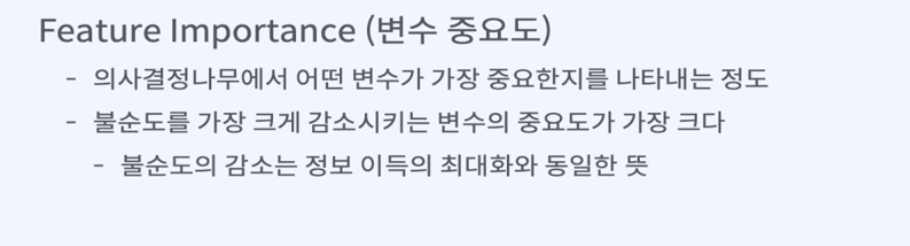

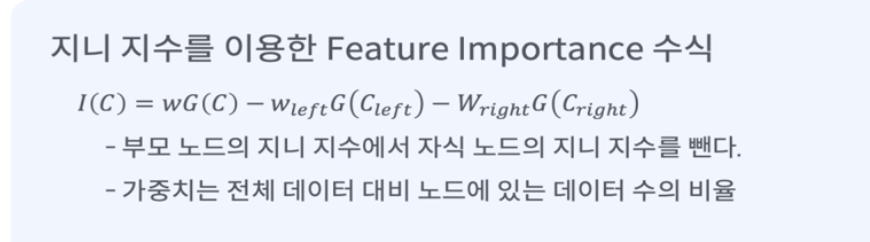

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

1.1 Sample data

In [ ]:
data = {
    "value":[30, 120, 150, 390, 400, 300, 500],
    "label":[0, 0, 1, 0, 0, 1, 0]
}

In [ ]:
data = pd.DataFrame(data)

In [1]:
data

NameError: ignored

# 2. Decision Tree 구현

2.1 변수 값에 따라 데이터를 정렬한다.

In [ ]:
sorted_data = data.sort_values(by="value") # by = 어떤값을 기준으로 데이터 정렬할지
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [ ]:
# 인덱스 초기화 
sorted_data = sorted_data.reset_index(drop=True) # drop = True
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


In [ ]:
# sorted_data = sorted_data.reset_index(drop=False) # drop = False 인덱스 컬럼새로 생기게 됨

2.2 정답이 바뀌는 경계 지점을 찾는다.

In [ ]:
# 현재 데이터 - 전에 데이터
sorted_data["label"].diff()

0    NaN
1    0.0
2    1.0
3    0.0
4   -1.0
5    0.0
6    0.0
Name: label, dtype: float64

In [ ]:
# 0 이 아닌 값에서는 정답이 변했다라고 판단함
boundary = sorted_data["label"].diff() != 0

In [ ]:
boundary 

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [ ]:
boundary[0] = False # NaN값은 경계가 아니라는걸 알려줘야함

In [ ]:
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [ ]:
boundary.loc[boundary]

2    True
4    True
Name: label, dtype: bool

In [ ]:
boundary_idx = boundary.loc[boundary].index
# .loc[0] 0번째 행만 뽑아옴
# .loc[boudary] true인 값만 뽑아서 인덱싱해줘

In [ ]:
boundary_idx

Int64Index([2, 4], dtype='int64')

2.3 경계의 평균값을 기준으로 잡는다.

In [ ]:
idx_1 = boundary_idx[0]

In [ ]:
data.loc[[idx_1-1, idx_1],"value"]

1    120
2    150
Name: value, dtype: int64

In [ ]:
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [ ]:
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()

In [ ]:
bound_value_1

135.0

두 번째 경계 구간

In [ ]:
idx_2 = boundary_idx[1]

In [ ]:
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()

In [ ]:
bound_value_2

395.0

2.4 구간별 경계값을 기준으로 정보 이득을 계산

In [ ]:
def gini_index(label):
  p1 = (label == 0).mean() # label 이 0인 개수
  p2 = 1 - p1
  return 1 - (p1 ** 2 + p2 ** 2)

def concat_gini_index(left, right):
  left_gini = gini_index(left)
  right_gini = gini_index(right)
  all_num = len(left) + len(right)
  left_gini *= len(left) / all_num
  right_gini *= len(right) / all_num
  return left_gini + right_gini

135를 경계로 나눌 때

In [ ]:
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [ ]:
left_1

0    0
1    0
Name: label, dtype: int64

In [ ]:
right_1

2    1
3    1
4    0
5    0
6    0
Name: label, dtype: int64

In [ ]:
gini_index(right_1)

0.48

In [ ]:
concat_gini_index(left_1, right_1)

0.34285714285714286

345를 경계로 나눌 때

In [ ]:
left_2 = sorted_data.loc[:idx_2 - 1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

In [ ]:
# 345를 기준으로 나눴을때 지니지수가 가장 낮으므로 345기주으로 나누게됨
concat_gini_index(left_2, right_2)

0.2857142857142857

3. Decision Tree Package

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)

In [ ]:
tree.fit(data["value"].to_frame(), data["label"])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

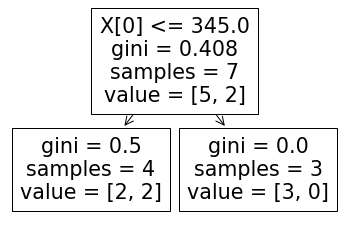

In [ ]:
plot_tree(tree)